# **Visulaizing Data using matplotlib**

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

importing matplotlib

In [3]:
import matplotlib.pyplot as plt


**Plotting Data**

Plotting job post dates

In [5]:
#df.job_posted_date.head()
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index() # sort/organize the dates in ascendig

In [ ]:
date_counts

In [ ]:
plt.plot(date_counts.index, date_counts)

Aggrigating by month

In [7]:
df['job_posted_month'] = df['job_posted_date'].dt.month # create a new col pulling months from job_posted_date

In [9]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


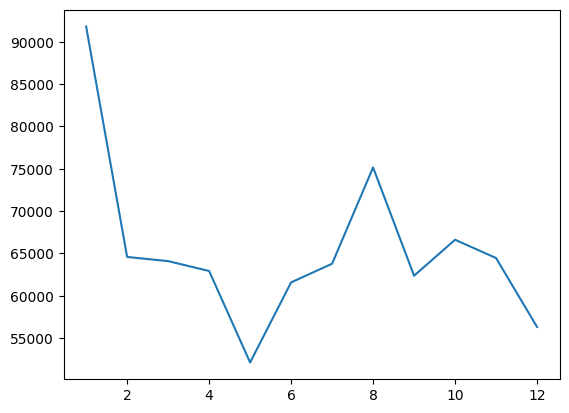

In [11]:
plt.plot(monthly_counts.index, monthly_counts.values)

**Bar Chart - Count of Job Posting**

In [16]:
job_counts = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

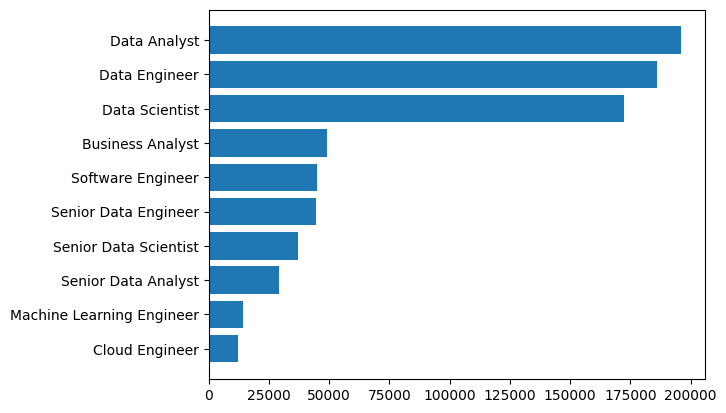

In [20]:
job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index, job_counts)